#  student score prediction based on hours studied

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pex
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv(r"https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# displaying info of the data set

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# displaying stats of the data set

In [5]:
dataset.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# checking for null values of the data set

In [6]:
dataset.isnull().sum()

Hours     0
Scores    0
dtype: int64

# ploting the trendline of the regression using plotly

In [24]:
fig = pex.scatter(dataset, x="Hours", y="Scores",title="Hours studied vs score obtained",trendline='ols')

fig.show()

# plotting the regplot using seaborn on the data set variable

<AxesSubplot:title={'center':'Hours studied vs score obtained'}, xlabel='Hours', ylabel='Scores'>

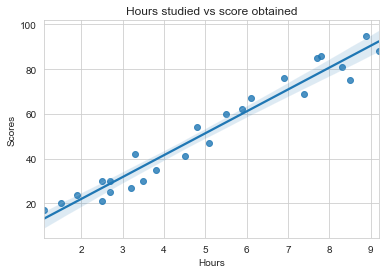

In [8]:
sns.set_style("whitegrid")
plt.title("Hours studied vs score obtained")
sns.regplot(data=dataset, x= "Hours",y="Scores")

# plotting the correlation of a data set
<h3> the below image shows that the both variables are strongly correlated to each other </h3>

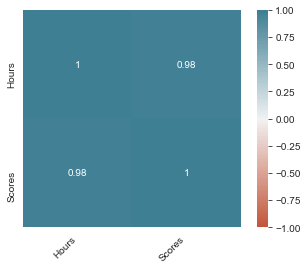

In [9]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,annot = True,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');

# feature selection to train the model

In [10]:
x= dataset.iloc[:, :-1].values  
y= dataset.iloc[:, 1].values


# splitting the data set into test and train

In [11]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.2, random_state=0)
print("x_train:",x_train)
print("x_test:",x_test)
print("y_train:",y_train)
print("y_test:",y_test)

x_train: [[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
x_test: [[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
y_train: [35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]
y_test: [20 27 69 30 62]


# fitting the x_train and y_train into the modell to train on them

In [12]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression()

# making prediction on the given input

In [13]:
y_predict = regressor.predict(x_test)
predicted_data=pd.DataFrame({'Hours': [i[0] for i in x_test],'score':[j for j in y_predict]})
predicted_data

,Hours,score
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


# comparing the actual and predicted score

In [14]:
compare_marks = pd.DataFrame({'Actual score': y_test,'predicted score': y_predict})
compare_marks

,Actual score,predicted score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# ploting the actual and predicted values 

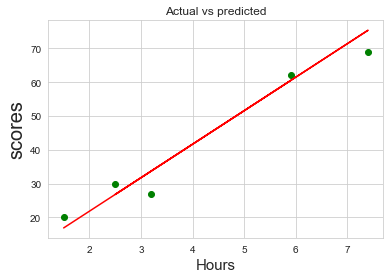

In [44]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, y_predict, color="red") 
plt.title('Actual vs predicted')
plt.xlabel("Hours",size=15)  
plt.ylabel("scores",size= 20) 
plt.show()   

# predictiong the score based on the hours studied

In [53]:
hours = [float(input("enter hours studied :  "))]
score = regressor.predict([hours])
print("score obtained after studying {} hrs".format(hours[0]),"score obtained is: ",score[0])

enter hours studied :  9.25
score obtained after studying 9.25 hrs score obtained is:  93.69173248737538


# evaluating the model under all the metrices

In [45]:
from sklearn import metrics

print("Mean absolute Error  :",metrics.mean_absolute_error(y_true=y_test, y_pred=y_predict))#MAE
print("Mean squre Error     :",metrics.mean_squared_error(y_true=y_test, y_pred=y_predict))#MSE
print("Root Mean squareError:",np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_predict)))#RMSE

Mean absolute Error  : 4.183859899002975
Mean squre Error     : 21.5987693072174
Root Mean squareError: 4.6474476121003665
